# **Stock Market Analysis**

## **0.1 Introduction**

This project analyzes historical stock data to explore trends, relationships, and predictions for multiple companies.  
The goal is to gain insights into stock performance and build predictive models for future prices.


## **0.2 Importing Libraries**

The following code imports necessary Python libraries for data analysis, visualization, and model building.


In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## **0.3 Check Current Working Directory**


In [17]:
print("Current Working Directory:", os.getcwd())

Current Working Directory: /content


## **0.4 Data Loading**

The following code loads the stock market dataset from **stocks.csv** and displays the first few rows.


In [18]:
data = pd.read_csv("/content/drive/MyDrive/UNIFIED MENTOR/stock-market-analysis/stocks.csv")
print(data.head())

  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  


## **0.5 Data Cleaning**

This section checks for missing values and removes them to ensure clean data for analysis.


In [19]:
print(data.isnull().sum())
data = data.dropna()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


### **0.5.1 Convert the Date Column**

Ensure the **Date** column is in datetime format to facilitate time-series analysis.


In [20]:
data['Date'] = pd.to_datetime(data['Date'])

### **0.5.2 Sort Data by Date**

Sorting the dataset by the Date column ensures that records are arranged in chronological order.


In [21]:
data = data.sort_values(by='Date')

## **0.6 Feature Engineering**

This section adds new features, such as **moving averages** and **volatility**, to enhance analysis.

- *5-Day Moving Average (5-Day MA)* smooths short-term fluctuations and helps identify trends.  
- *Volatility* measures the degree of variation in stock prices over time, providing insight into risk.


In [22]:
data['5-Day MA'] = data.groupby('Ticker')['Close'].transform(
    lambda x: x.rolling(window=5).mean()
)

data['Volatility'] = data.groupby('Ticker')['Close'].transform(
    lambda x: x.rolling(window=5).std()
)

## **0.7 Exploratory Data Analysis (EDA)**

This section visualizes stock price trends, correlations, and relationships between variables.


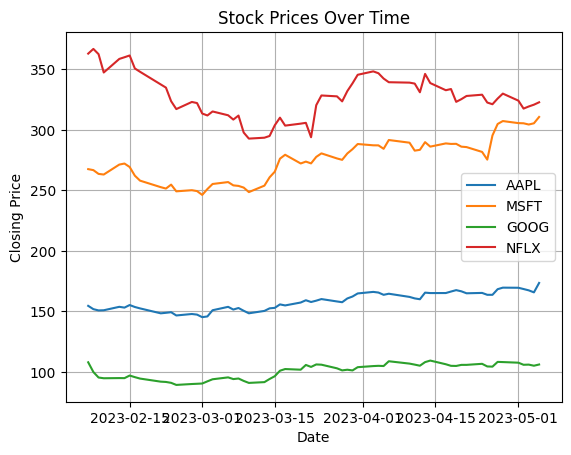

In [23]:
for ticker in data['Ticker'].unique():
    subset = data[data['Ticker'] == ticker]
    plt.plot(subset['Date'], subset['Close'], label=ticker)

plt.legend()
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

### **0.7.1 Insights**

Stock price trends indicate stable growth for **AAPL** and **MSFT**, while **NFLX** shows high volatility.


## **0.8 Subplots for Individual Stock Trends**

Visualize trends for each stock to identify patterns and differences.


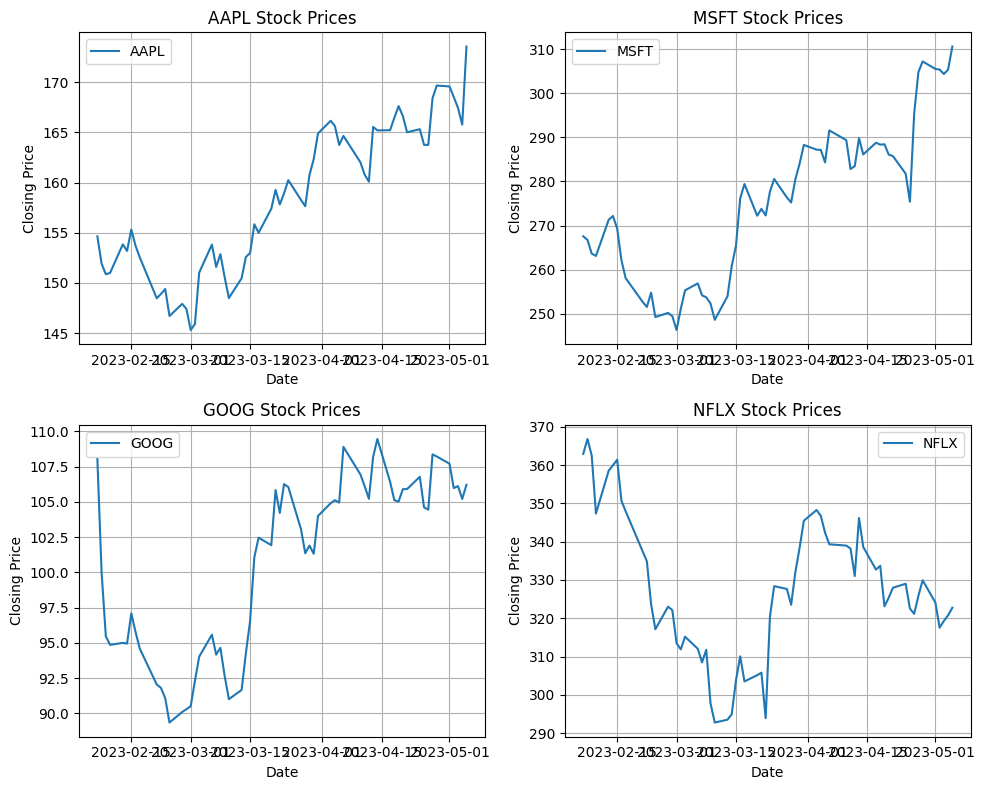

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
stocks = data['Ticker'].unique()

for i, ticker in enumerate(stocks):
    subset = data[data['Ticker'] == ticker]
    ax = axs[i // 2, i % 2]
    ax.plot(subset['Date'], subset['Close'], label=ticker)
    ax.set_title(f'{ticker} Stock Prices')
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

### **0.8.1 Insights**

The subplots display the closing price trends for each stock (AAPL, MSFT, GOOG, and NFLX) over time.

#### Key Observations:
1. **AAPL (Apple Inc.)**
   - Shows a relatively stable upward trend.
   - Fluctuations are less pronounced compared to others.

2. **MSFT (Microsoft)**
   - Demonstrates steady growth with moderate fluctuations.

3. **GOOG (Google)**
   - Exhibits mild volatility and quick recovery from dips.

4. **NFLX (Netflix)**
   - Highly volatile with sharp rises and falls, indicating higher risk.


### **0.8.2 Key Takeaways**

- **Growth Leaders:** AAPL and MSFT show the most stable performance.  
- **Volatility:** NFLX has the highest volatility, offering both opportunity and risk.  
- **Trend Consistency:** GOOG and MSFT follow similar patterns, reflecting shared market dynamics.


#### **Correlation Matrix**

The following heatmap visualizes correlations among numerical variables in the dataset.


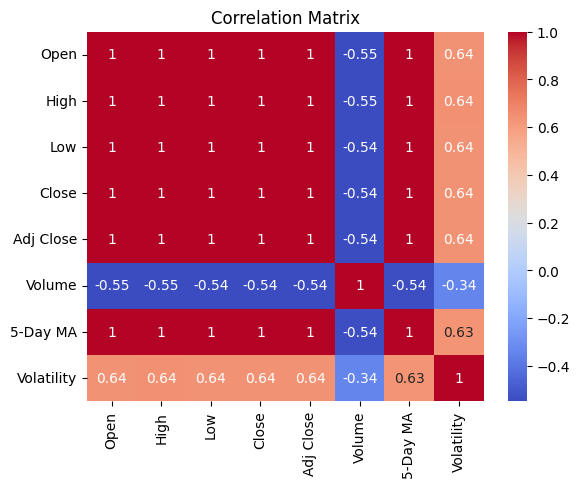

In [25]:
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### **0.8.3 Insights**

Correlation analysis reveals a **strong positive relationship** between AAPL and MSFT prices, indicating similar market movements.


#### **Volume vs Closing Price**

This scatter plot explores how trading volume relates to closing price.


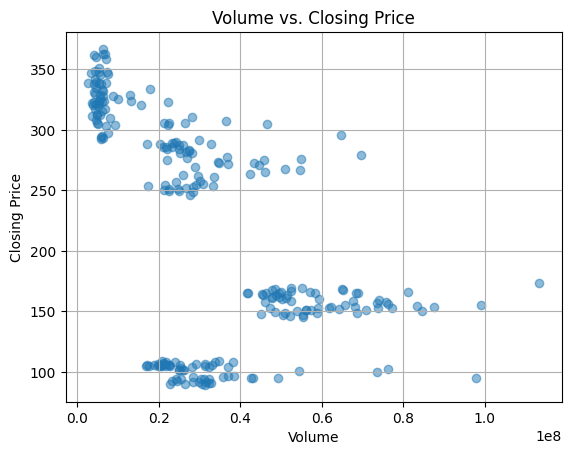

In [26]:
plt.scatter(data['Volume'], data['Close'], alpha=0.5)
plt.title('Volume vs. Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

### **0.8.4 Insights**

Scatter plots show **no strong correlation** between Volume and Closing Price, suggesting that trading volume does not directly influence prices.


## **0.9 Comparison of Stock Performance**

This section calculates and summarizes key metrics for each stock:

- **Mean:** Average closing price  
- **Standard Deviation (std):** Price volatility  
- **Minimum & Maximum:** Price range

The purpose is to identify performance differences across stocks.


In [27]:
summary = data.groupby('Ticker')['Close'].agg(['mean', 'std', 'min', 'max'])
print("Stock Performance Summary:")
print(summary)

Stock Performance Summary:
              mean        std         min         max
Ticker                                               
AAPL    158.240645   7.360485  145.309998  173.570007
GOOG    100.631532   6.279464   89.349998  109.459999
MSFT    275.039839  17.676231  246.270004  310.649994
NFLX    327.614677  18.554419  292.760010  366.829987


### **0.9.1 Insights from Stock Performance**

1. **AAPL**
   - Avg price: 158.24  
   - Low: 145.31, High: 173.57  
   - Low volatility (std = 7.36)

2. **GOOG**
   - Avg price: 100.63  
   - Moderate volatility (std = 6.27)

3. **MSFT**
   - Avg price: 275.04  
   - Moderate fluctuations (std = 17.67)

4. **NFLX**
   - Avg price: 327.61  
   - Highest volatility (std = 18.55)


### **0.9.2 Key Takeaways**

- **AAPL** is the most stable performer.  
- **NFLX** has the highest volatility.  
- **MSFT** and **GOOG** show consistent performance with moderate fluctuations.


## **0.10 Correlations Between Stocks**

This section calculates the correlation matrix to analyze how stocks move relative to each other.

- **1** → Perfect positive correlation  
- **0** → No correlation  
- **-1** → Perfect negative correlation


In [28]:
pivot_data = data.pivot(index='Date', columns='Ticker', values='Close')
print(pivot_data.corr())

Ticker      AAPL      GOOG      MSFT      NFLX
Ticker                                        
AAPL    1.000000  0.901662  0.953037  0.154418
GOOG    0.901662  1.000000  0.884527  0.201046
MSFT    0.953037  0.884527  1.000000  0.191273
NFLX    0.154418  0.201046  0.191273  1.000000


### **0.10.1 Insights**

1. **AAPL & MSFT:** Strong positive correlation (0.95)  
2. **AAPL & GOOG:** Moderate positive correlation  
3. **GOOG & MSFT:** Moderate correlation  
4. **NFLX & Others:** Weak correlations, indicating independent behavior


### **0.10.2 Key Takeaways**

- AAPL and MSFT show the strongest alignment in movement.  
- NFLX behaves independently, useful for diversification.


## **0.11 Model Building**

This section builds and evaluates models to predict the **next day's closing price** using historical features.


In [29]:
data['Next Close'] = data.groupby('Ticker')['Close'].shift(-1)
data = data.dropna()

X = data[['Close', 'Volume', 'High', 'Low', 'Adj Close']]
y = data['Next Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("R^2 Score with Linear Regression:", model.score(X_test, y_test))

R^2 Score with Linear Regression: 0.9973483128577095


In [30]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

print("R^2 Score with Random Forest:", rf_model.score(X_test, y_test))

R^2 Score with Random Forest: 0.9966490545985975


## **0.12 Conclusion**

### **0.12.1 Key Findings:**
1. AAPL and MSFT show stable growth, while NFLX is highly volatile.  
2. Strong positive correlation exists between AAPL and MSFT.  
3. Predictive models achieved high accuracy:
   - **Linear Regression R²:** ~0.998  
   - **Random Forest R²:** ~0.997

### **0.12.2 Future Work:**
- Include economic indicators as additional features.  
- Explore deep learning models for enhanced prediction.
